In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("test_scores.csv")

In [4]:
#checking the head of df
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [6]:
df["school"].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

# data analysis and visualisation :

<AxesSubplot:xlabel='school', ylabel='count'>

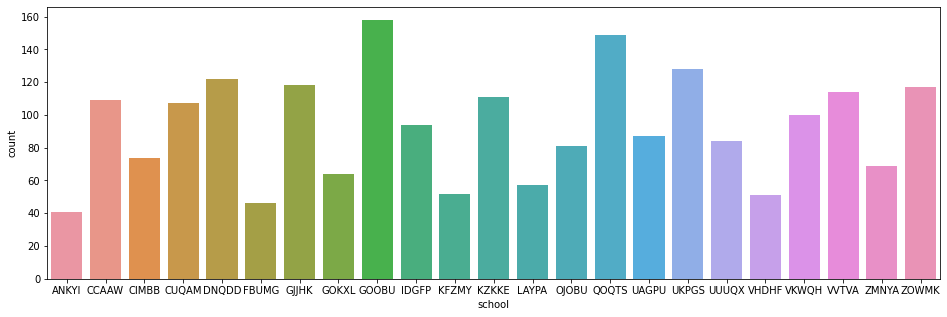

In [7]:
plt.figure(figsize=(16,5))
sns.countplot(data=df,x="school")

In [8]:
df.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


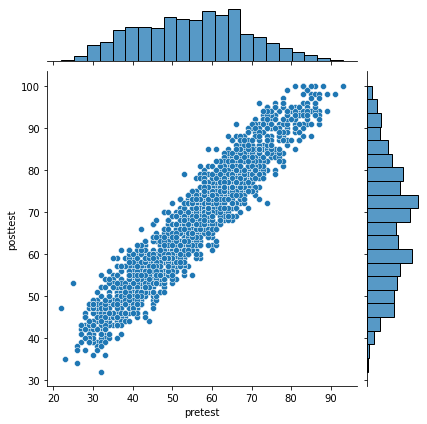

In [9]:
sns.jointplot(df["pretest"],df["posttest"])

<AxesSubplot:xlabel='school', ylabel='posttest'>

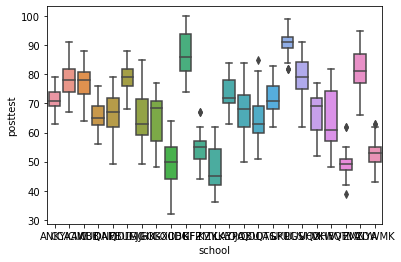

In [10]:
sns.boxplot(df["school"],df["posttest"])

<AxesSubplot:xlabel='school_setting', ylabel='posttest'>

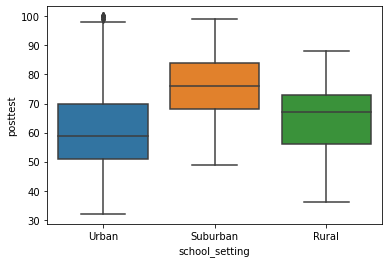

In [11]:
sns.boxplot(df["school_setting"],df["posttest"])

In [12]:
# count how many student per class
df["n_student"].value_counts()

22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name: n_student, dtype: int64

# Data Cleaning :

In [13]:
df.isnull().sum() # we 0 null 

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [14]:
df.select_dtypes("object").columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'student_id', 'gender', 'lunch'],
      dtype='object')

In [15]:
df["student_id"] 

0       2FHT3
1       3JIVH
2       3XOWE
3       556O0
4       74LOE
        ...  
2128    T8LSK
2129    VNP26
2130    YDR1Z
2131    YUEIH
2132    ZVCQ8
Name: student_id, Length: 2133, dtype: object

In [16]:
# i will drop the student id 
df = df.drop("student_id",axis=1)

In [17]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0


In [18]:
cols = df.select_dtypes("object").columns
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
le = LabelEncoder()
for i in cols :
  df2[i] = df2[[i]].apply(le.fit_transform)

In [19]:
df2.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,2,0,22,1,20.0,0,0,62.0,72.0
1,0,2,0,22,1,20.0,0,0,66.0,79.0
2,0,2,0,22,1,20.0,1,0,64.0,76.0
3,0,2,0,22,1,20.0,0,0,61.0,77.0
4,0,2,0,22,1,20.0,1,0,64.0,76.0


In [20]:
from sklearn.model_selection import train_test_split
X = df["pretest"].values.reshape(-1,1) 
y = df["posttest"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression
svr = LinearRegression()
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

3.586352028437999
4.342623648767632


<AxesSubplot:xlabel='posttest'>

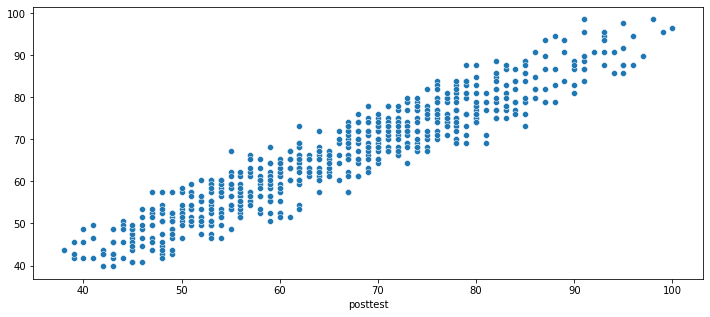

In [23]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=y_test,y=pred)